In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, precision_score,\
    classification_report, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from imblearn.metrics import geometric_mean_score
import data_cleaning as dc
import importlib

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [ ]:
np.seterr(divide='ignore', invalid='ignore')

In [17]:
importlib.reload(dc)
split_size = 0.2
balanced = True
show_number_of_data = True
X_train, X_test, y_train, y_test = dc.choose_data(balanced, split_size, show_number_of_data)

Train data: 81642
Test data: 16800


In [18]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)
fpr_org, tpr_org, _ = roc_curve(y_test, y_pred)
y_pred = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred)

print('ACC-org :', round(accuracy_score(y_test, y_pred), 3))
print('AUC-org :', round(auc(fpr_org, tpr_org), 3))
print('G-mean-org :', round(geometric_mean_score(y_test, y_pred.ravel()), 3))
print('F1-org :', round(f1_score(y_test, y_pred), 3))
print('Sens-org :', round(cm[1, 1] / (cm[1, 0] + cm[1, 1]), 3))
print('Spec-org :', round(cm[0, 0] / (cm[0, 0] + cm[0, 1]), 3))
print('Prec-org :', round(precision_score(y_test, y_pred), 3))
print('\nConfusion matrix\n', confusion_matrix(y_test, y_pred))

ACC-org : 0.844
AUC-org : 0.852
G-mean-org : 0.726
F1-org : 0.579
Sens-org : 0.584
Spec-org : 0.902
Prec-org : 0.573

Confusion matrix
 [[12383  1339]
 [ 1280  1798]]


In [24]:
print('Report: ', classification_report(y_test, y_pred))

Report:                precision    recall  f1-score   support

           0       0.91      0.90      0.90     13722
           1       0.57      0.58      0.58      3078

    accuracy                           0.84     16800
   macro avg       0.74      0.74      0.74     16800
weighted avg       0.85      0.84      0.84     16800



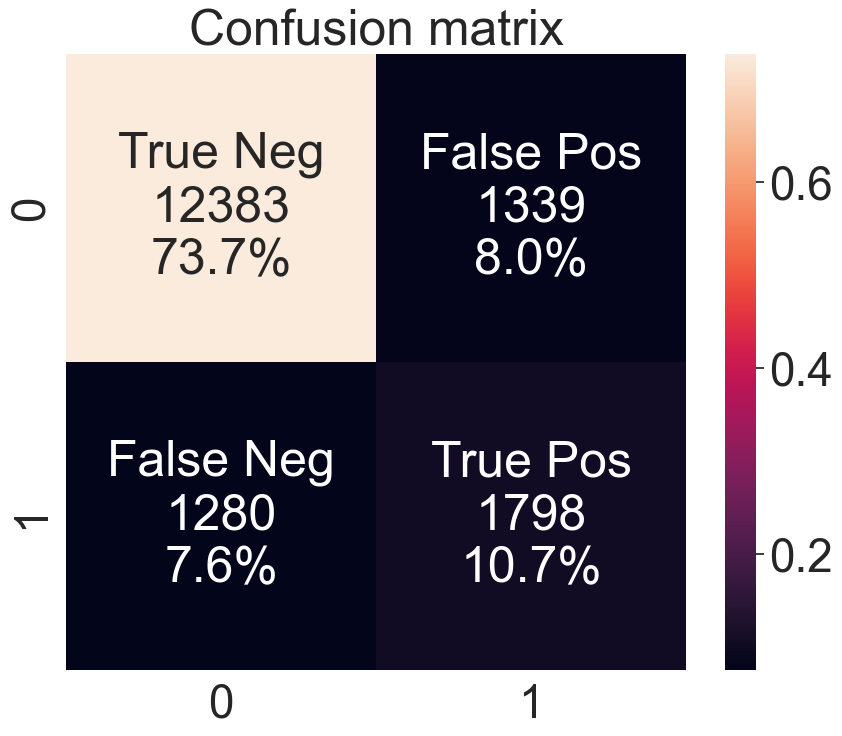

In [21]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in
                     cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

plt.rcParams["figure.figsize"] = (10, 8)
ax = sns.heatmap(cm / np.sum(cm), annot=labels,
                 fmt='')
sns.set(font_scale=3)
ax.set_title('Confusion matrix')
plt.show()

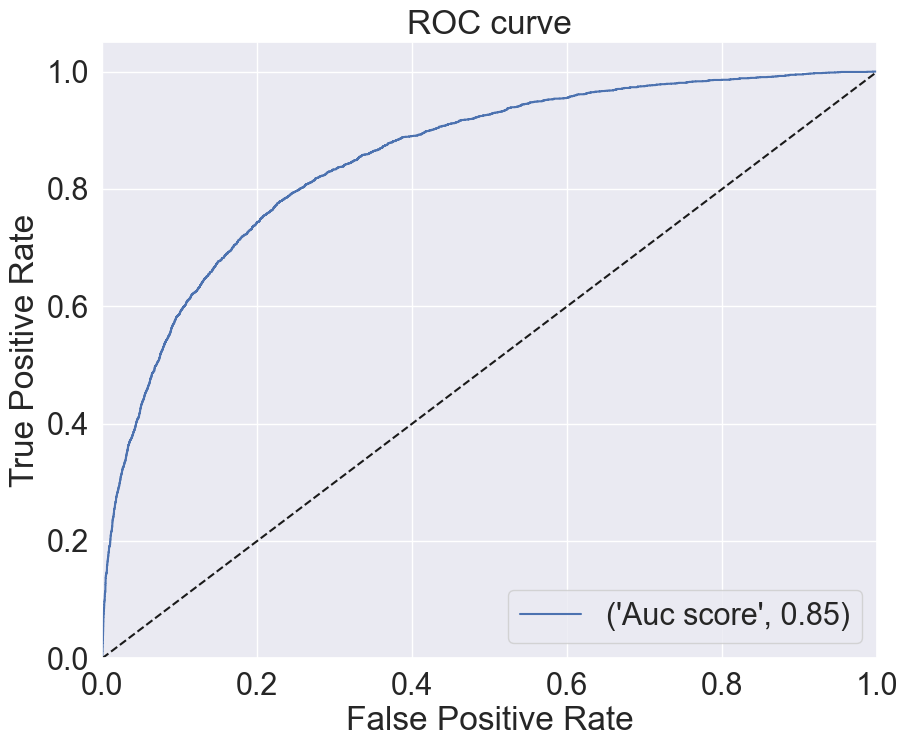

In [26]:
predictions = model.predict(X_test)
sns.set(font_scale=2)
fpr, tpr, _ = roc_curve(y_test, predictions)
plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
plt.plot(fpr, tpr, label=('Auc score', round(auc(fpr, tpr), 2)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()